Get the Titanic dataset:

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2022-10-12 05:11:08--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2022-10-12 05:11:08 (5.09 MB/s) - ‘train.csv’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [ ]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)
data.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0.5, 0, 'Number of siblings')

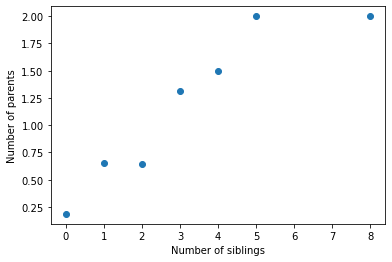

In [ ]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt
import numpy as np
d = data.groupby('SibSp')
y = d.Parch.mean().tolist()
x = np.sort(pd.Series(data['SibSp'].values).unique())
plt.scatter(x,y)
plt.ylabel("Number of parents")
plt.xlabel("Number of siblings")



In [ ]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

def feature_selection_and_preprocessing(dataset):

  dataset['Sex'].replace(['female', 'male'],
                        [0, 1], inplace=True)

  features = dataset[["Fare", "Parch","Sex"]].copy()

  return features

model = KNeighborsClassifier(
    weights = 'distance',
    n_neighbors=14
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.84


Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [ ]:
from sklearn.model_selection import train_test_split
dataset = data.copy()
dataset['Sex'].replace(['female', 'male'],
                      [0, 1], inplace=True)

features = dataset[["Fare", "Parch","Sex"]].copy()
X_train, X_test, y_train, y_test = train_test_split( features,dataset['Survived'], test_size=.112,random_state=42)

predictions=model.predict(X_test)
print("Test accuracy:", accuracy_score(
    y_test,
    predictions
))

Test accuracy: 0.9
